In [1]:
from datasets import *
from train import *
from torchvision import datasets, transforms, models
torch.backends.quantized.engine = 'qnnpack'
model = models.quantization.mobilenet_v2(weights='DEFAULT',quantize=True)
# model = models.mobilenet_v2(weights='MobileNet_V2_Weights.DEFAULT')

/home/gc28692/anaconda3/envs/cl/lib/python3.9/site-packages/torch/ao/quantization/utils.py:287: UserWarning: must run observer before calling calculate_qparams. Returning default values.
  warnings.warn(


In [2]:
model = models.mobilenet_v2(weights='MobileNet_V2_Weights.IMAGENET1K_V1').to('cuda')
# val_loader = load_imagenetc_val(256,1234,corruption="gaussian_noise",severity=1)
val_loader = load_imagenet_val(256,1234)
validate(model,val_loader,'cuda')

100%|██████████| 196/196 [01:00<00:00,  3.26it/s]


(0.20128, 8.707488473580808, 0.41262)

In [2]:
# model = models.mobilenet_v2(weights='MobileNet_V2_Weights.IMAGENET1K_V1').to('cuda')
model = models.mobilenet_v3_small(weights='DEFAULT').to('cuda')
val_loader = load_imagenet_val(128,1234)
# val_loader = load_imagenetc_val(256,1234,corruption="gaussian_noise",severity=5)
validate(model,val_loader,'cuda')

100%|██████████| 391/391 [01:10<00:00,  5.53it/s]


(0.67668, 1.3435197160067156, 0.87406)

In [34]:
with torch.no_grad():
    sub_classes_w = model.classifier[1].weight[:200,:]
    sub_classes_b = model.classifier[1].bias[:200]
    new_layer = torch.nn.Linear(sub_classes_w.size()[1],sub_classes_w.size()[0])
    new_layer.weight[:,:] = sub_classes_w
    new_layer.bias[:] = sub_classes_b
    model.classifier[1] = new_layer


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

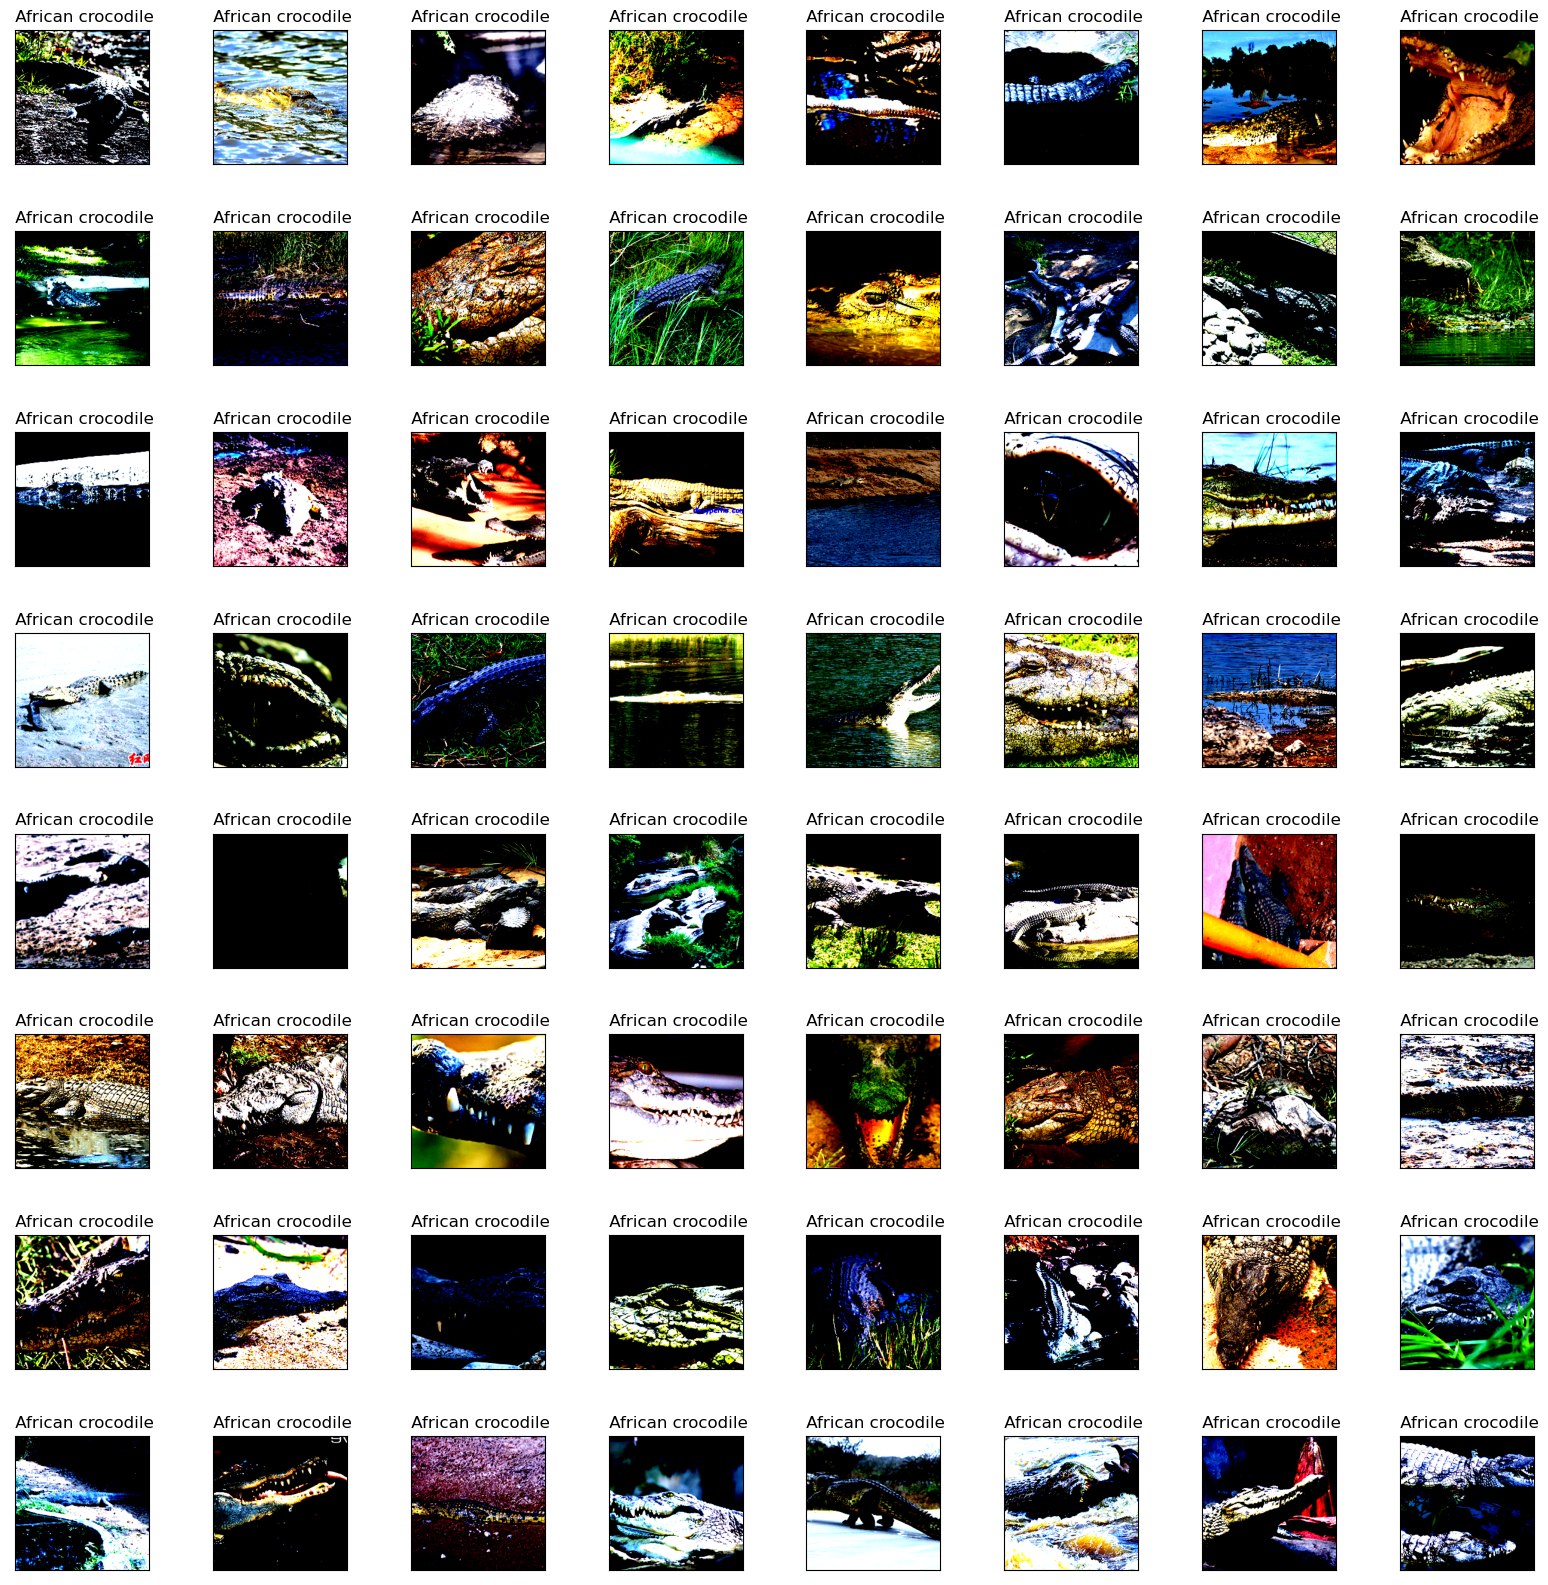

In [8]:
train_loader, val_loader= load_imagenet(64,1234,True,[49,23])
device = 'cuda'
# model = models.mobilenet_v2(num_classes=200)
train_loader.dataset.dataset.visualize_batch()

In [3]:
train(model,train_loader,val_loader,device)
# train_sub(b_model, s_model, train_loader, val_loader, device)

100%|██████████| 157/157 [00:00<00:00, 160.38it/s]


Train Epoch: 0 [0/90000 (0%)] train loss: 5.323, val loss: 5.298, val acc: 0.005, top5: 0.025, lr: 0.04500000


100%|██████████| 157/157 [00:00<00:00, 164.93it/s]


Train Epoch: 0 [51200/90000 (57%)] train loss: 5.297, val loss: 5.300, val acc: 0.003, top5: 0.021, lr: 0.04500000


100%|██████████| 157/157 [00:00<00:00, 161.66it/s]


Train Epoch: 1 [0/90000 (0%)] train loss: 5.300, val loss: 5.299, val acc: 0.004, top5: 0.021, lr: 0.04410000


100%|██████████| 157/157 [00:00<00:00, 165.19it/s]


Train Epoch: 1 [51200/90000 (57%)] train loss: 5.295, val loss: 5.300, val acc: 0.004, top5: 0.021, lr: 0.04410000


100%|██████████| 157/157 [00:00<00:00, 159.71it/s]


Train Epoch: 2 [0/90000 (0%)] train loss: 5.298, val loss: 5.300, val acc: 0.004, top5: 0.019, lr: 0.04321800


100%|██████████| 157/157 [00:00<00:00, 159.43it/s]


Train Epoch: 2 [51200/90000 (57%)] train loss: 5.294, val loss: 5.300, val acc: 0.004, top5: 0.020, lr: 0.04321800


KeyboardInterrupt: 